### Student Information
Name: 陳翼弘

Student ID: 103033617

GitHub ID:22215314

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
# -- set up dataset environment-- #
import os
import os.path
import helpers.data_mining_helpers as dmh
import numpy as np
nas_folder_path = "NAS_NEAF/課程/2021_DataMining/sentiment labelled sentences/sentiment labelled sentences"
file_names = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']


In [2]:
# -- load dataset -- #
import csv

dataset = []
dataset_data = []
dataset_score = []
dataset_lib = []
dataset_lib_name = []
for index, file_name in enumerate(file_names):
    
    fileID = open(os.path.join(os.path.expanduser('~'), nas_folder_path, file_names[index]))
    dataset_temp = list(csv.reader(fileID, delimiter = "\t"))
    
    print(len(dataset_temp))
    fileID.close()    
    # dataset_data_temp = [i[0] for i in dataset]
    # dataset_score_temp = [i[1] for i in dataset]
    
    dataset.extend(dataset_temp)
    dataset_data.extend([i[0] for i in dataset_temp])
    dataset_score.extend([i[1] for i in dataset_temp])
    dataset_lib.extend([int(index) for i in dataset_temp])
    dataset_lib_name.extend([file_name[:-13] for i in dataset_temp])

1000
1000
1000


In [3]:
len(dataset_lib)

3000

In [4]:
# -- show firt # data -- #
dataset_lib_name

['amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells

In [5]:
dataset_data[0:2]

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.']

In [6]:
print(file_names[dataset_lib[0]])

amazon_cells_labelled.txt


In [7]:
dataset_lib[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [8]:
import pandas as pd
# import helpers.data_mining_helpers as dmh


DS = pd.DataFrame(dataset, columns=['text', 'score'])

In [9]:
DS

,text,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


In [10]:
DS['lib_name'] = dataset_lib_name

In [11]:
DS['lib'] = dataset_lib

In [12]:
DS = DS.sample(frac=1).reset_index(drop=True)

In [13]:
DS

,text,score,lib_name,lib
0,My Sanyo has survived dozens of drops on black...,1,amazon_cells,0
1,It was delicious!!!,1,yelp,2
2,Generally; it just lacked imagination.,0,imdb,1
3,"Still, it makes up for all of this with a supe...",1,imdb,1
4,AVOID THIS ESTABLISHMENT!,0,yelp,2
...,...,...,...,...
2995,All the other cases I've tried normally fall a...,1,amazon_cells,0
2996,But the convoluted plot just didn't convince m...,0,imdb,1
2997,This is my new fav Vegas buffet spot.,1,yelp,2
2998,Reversible plug works great.,1,amazon_cells,0


In [14]:
DS.iloc[::10, 0:2][0:10]

,text,score
0,My Sanyo has survived dozens of drops on black...,1
10,The instructions didn't explain that a microph...,0
20,"Phenomenal food, service and ambiance.",1
30,"Unfortunately, it only set us up for disapppoi...",0
40,"Bad script, bad direction and horrible acting ...",0
50,"Five star Plus, plus.",1
60,Shrimp- When I unwrapped it (I live only 1/2 a...,0
70,"When I'm on this side of town, this will defin...",1
80,"The microphone also works well, but (according...",1
90,"For about 10 minutes, we we're waiting for her...",0


In [15]:
DS.loc[::10, 'text'][0:10]

0     My Sanyo has survived dozens of drops on black...
10    The instructions didn't explain that a microph...
20               Phenomenal food, service and ambiance.
30    Unfortunately, it only set us up for disapppoi...
40    Bad script, bad direction and horrible acting ...
50                                Five star Plus, plus.
60    Shrimp- When I unwrapped it (I live only 1/2 a...
70    When I'm on this side of town, this will defin...
80    The microphone also works well, but (according...
90    For about 10 minutes, we we're waiting for her...
Name: text, dtype: object

In [16]:
DS.isnull()

,text,score,lib_name,lib
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


In [17]:
DS.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [18]:
DS.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [19]:
dummy_series = pd.Series(["dummy_record", "1"], index=["text", "score"])

In [20]:
dummy_series


text     dummy_record
score               1
dtype: object

In [21]:
result_with_series = DS.append(dummy_series, ignore_index=True)

In [22]:
result_with_series

,text,score,lib_name,lib
0,My Sanyo has survived dozens of drops on black...,1,amazon_cells,0.0
1,It was delicious!!!,1,yelp,2.0
2,Generally; it just lacked imagination.,0,imdb,1.0
3,"Still, it makes up for all of this with a supe...",1,imdb,1.0
4,AVOID THIS ESTABLISHMENT!,0,yelp,2.0
...,...,...,...,...
2996,But the convoluted plot just didn't convince m...,0,imdb,1.0
2997,This is my new fav Vegas buffet spot.,1,yelp,2.0
2998,Reversible plug works great.,1,amazon_cells,0.0
2999,"Much more interesting, more action, more suspe...",1,imdb,1.0


In [23]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [24]:
dummy_dict=[{'text':'dummy_record', 'score':'1'}]

In [25]:
DS = DS.append(dummy_dict, ignore_index=True)

In [26]:
len(DS)

3001

In [27]:
DS.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [28]:
DS.dropna(inplace=True)

In [29]:
DS.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [30]:
len(DS)

3000

In [31]:
sum(DS.duplicated('text'))

16

In [32]:
DS.duplicated('text')

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [33]:
duplicate=DS[DS.duplicated('text')]

In [34]:
duplicate['text']

576                                          Great Phone.
1076                                This is a great deal.
1129                                   Not recommended.  
1135                     Definitely worth checking out.  
1806                                        Great phone!.
1813    If you like a loud buzzing to override all you...
1884                               The food was terrible.
2250                                        Does not fit.
2394                                   I love this place.
2451                                        Works great!.
2487                    I would not recommend this place.
2608                              Don't buy this product.
2721                                         Great phone.
2840                     Excellent product for the price.
2904                                     I won't be back.
2988                                         Works great.
Name: text, dtype: object

In [35]:
DS.drop_duplicates(keep=False, inplace=True)

In [36]:
len(DS)

2968

In [37]:
DS_sample = DS.sample(n=1000)

In [38]:
DS_sample[0:4]

,text,score,lib_name,lib
677,Really good product.,1,amazon_cells,0.0
2642,"), and sometimes it was so embarrassing that I...",0,imdb,1.0
2863,"The staff is great, the food is delish, and th...",1,yelp,2.0
514,Highly unrecommended.,0,imdb,1.0


# Exercise 6 (take home)

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

imdb            996
yelp            992
amazon_cells    980
Name: lib_name, dtype: int64


<AxesSubplot:title={'center':'Library distribution'}>

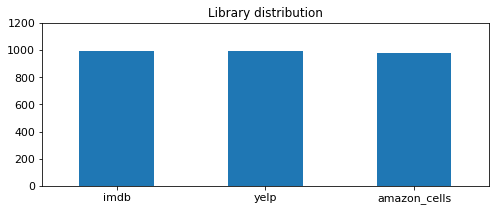

In [40]:
print(DS.lib_name.value_counts())
DS.lib_name.value_counts().plot(kind = 'bar',
                                title = 'Library distribution',
                                ylim = [0, 1200],
                                rot = 0, fontsize = 11, figsize = (8,3))

# Exercise 7

imdb            351
yelp            328
amazon_cells    321
Name: lib_name, dtype: int64


<AxesSubplot:title={'center':'Sample lib distribution'}>

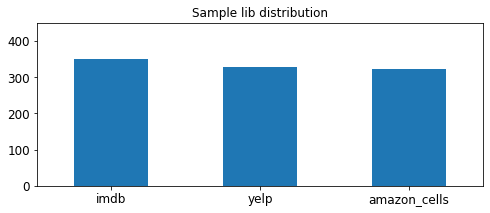

In [41]:
print(DS_sample.lib_name.value_counts())


# plot barchart for DS_sample
DS_sample.lib_name.value_counts().plot(kind = 'bar',
                                       title = 'Sample lib distribution',
                                       ylim = [0, 450],
                                       rot = 0, fontsize = 12, figsize = (8,3))

# Exercise 8

In [42]:
X = DS_sample.lib_name.value_counts().index

In [43]:
X_axis = np.arange(len(X))

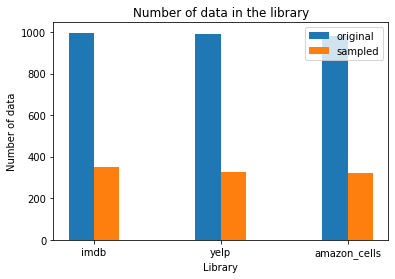

In [44]:
plt.bar(X_axis - 0.1, DS.lib_name.value_counts(), 0.2, label='original')
plt.bar(X_axis + 0.1, DS_sample.lib_name.value_counts(), 0.2, label='sampled')

plt.xticks(X_axis, X)
plt.xlabel("Library")
plt.ylabel("Number of data")
plt.title("Number of data in the library")
plt.legend()
plt.show()

# Feature Creation

In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/neaf-2070/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
DS['unigrams'] = DS['text'].apply(lambda x: dmh.tokenize_text(x))

In [47]:
DS[0:4]["unigrams"]

0    [My, Sanyo, has, survived, dozens, of, drops, ...
1                        [It, was, delicious, !, !, !]
2     [Generally, ;, it, just, lacked, imagination, .]
3    [Still, ,, it, makes, up, for, all, of, this, ...
Name: unigrams, dtype: object

In [48]:
DS[0:4]

,text,score,lib_name,lib,unigrams
0,My Sanyo has survived dozens of drops on black...,1,amazon_cells,0.0,"[My, Sanyo, has, survived, dozens, of, drops, ..."
1,It was delicious!!!,1,yelp,2.0,"[It, was, delicious, !, !, !]"
2,Generally; it just lacked imagination.,0,imdb,1.0,"[Generally, ;, it, just, lacked, imagination, .]"
3,"Still, it makes up for all of this with a supe...",1,imdb,1.0,"[Still, ,, it, makes, up, for, all, of, this, ..."


In [49]:
list(DS[0:1]['unigrams'])

[['My',
  'Sanyo',
  'has',
  'survived',
  'dozens',
  'of',
  'drops',
  'on',
  'blacktop',
  'without',
  'ill',
  'effect',
  '.']]

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
DS_counts = count_vect.fit_transform(DS.text)

In [51]:
analyze = count_vect.build_analyzer()

In [52]:
DS_counts.shape

(2968, 5154)

In [53]:
a = np.where(sum(DS_counts[0:20]).toarray()>0)[1]
print(a)
print(DS.text[16])
print(count_vect.get_feature_names()[a[0]])
DS_counts[0:16, a[0]].toarray()

[ 155  157  180  217  244  247  290  334  346  413  417  446  467  496
  530  549  594  638  647  654  674  692  713  768  963 1040 1201 1217
 1254 1266 1272 1367 1374 1414 1451 1462 1478 1527 1571 1580 1589 1639
 1742 1822 1829 1872 1883 1886 1941 1993 2002 2023 2105 2287 2292 2314
 2369 2376 2418 2427 2432 2441 2493 2506 2546 2558 2664 2715 2737 2758
 2871 2876 2918 2955 2982 3063 3097 3098 3122 3124 3133 3144 3166 3245
 3321 3334 3386 3409 3470 3567 3625 3647 3776 3868 3931 3966 3992 4066
 4132 4136 4150 4271 4302 4405 4431 4460 4515 4528 4530 4536 4544 4546
 4547 4557 4608 4628 4722 4820 4839 4845 4889 4890 4967 4973 5004 5011
 5013 5020 5031 5048 5068 5070 5090 5095 5117 5137 5140]
Food was really boring.
after


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [54]:
# -- count for the specific number of document -- #
numDoc = 20

total_voc_count = sum(DS_counts[0:20]).toarray()

In [55]:
total_voc_count.shape

(1, 5154)

In [56]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(total_voc_count)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0 

In [57]:
first_num_voc = total_voc_count[0].argsort()[-50:][::-1]

In [58]:
first_num_voc[:]

array([4530, 2432, 4557,  217, 4889, 2427, 3097, 4967, 4608, 4820, 2314,
       3063, 2105, 3409,  638,  768, 4528,  594, 1822, 3122,  417, 5068,
       1829, 1580,  713, 2982, 2558, 3625, 3334, 5140, 1527, 2418, 2737,
       3992, 4536, 2664, 5020, 4544, 4546, 4547, 5013, 4839,  247, 1478,
       3931, 1201, 4890, 2441,  244, 1571])

In [59]:
first_num_voc.shape

(50,)

In [60]:
list_num_voc = [count_vect.get_feature_names()[i] for i in first_num_voc[:] ]

In [61]:
print(list_num_voc)

['the', 'it', 'this', 'and', 'very', 'is', 'of', 'was', 'to', 'up', 'in', 'not', 'has', 'poor', 'but', 'charger', 'that', 'broken', 'food', 'on', 'be', 'with', 'for', 'even', 'case', 'my', 'laptop', 'really', 'pictures', 'your', 'ending', 'ir', 'made', 'serves', 'their', 'little', 'when', 'there', 'these', 'they', 'went', 'used', 'anything', 'effect', 'sea', 'delicious', 'vessel', 'jack', 'any', 'establishment']


In [62]:
plot_x = ["term_" + str(i) for i in list_num_voc]
plot_y = ["doc_" + str(i) for i in list(DS.index)[0:20]]
plot_z = DS_counts[0:20, first_num_voc[:]].toarray()

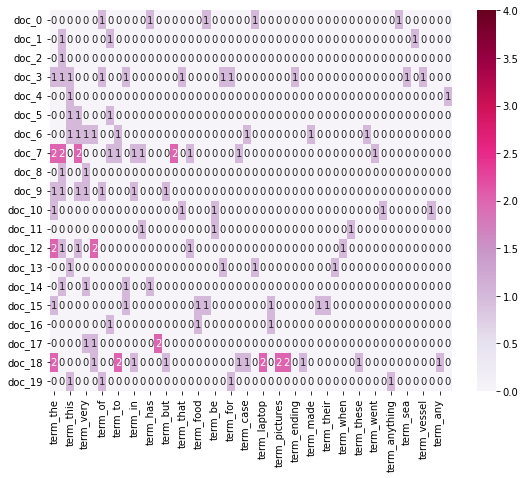

In [63]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=4, annot=True)

In [64]:
from sklearn.decomposition import PCA

In [65]:
DS_reduced = PCA(n_components=2).fit_transform(DS_counts.toarray())

In [66]:
DS_reduced.shape

(2968, 2)

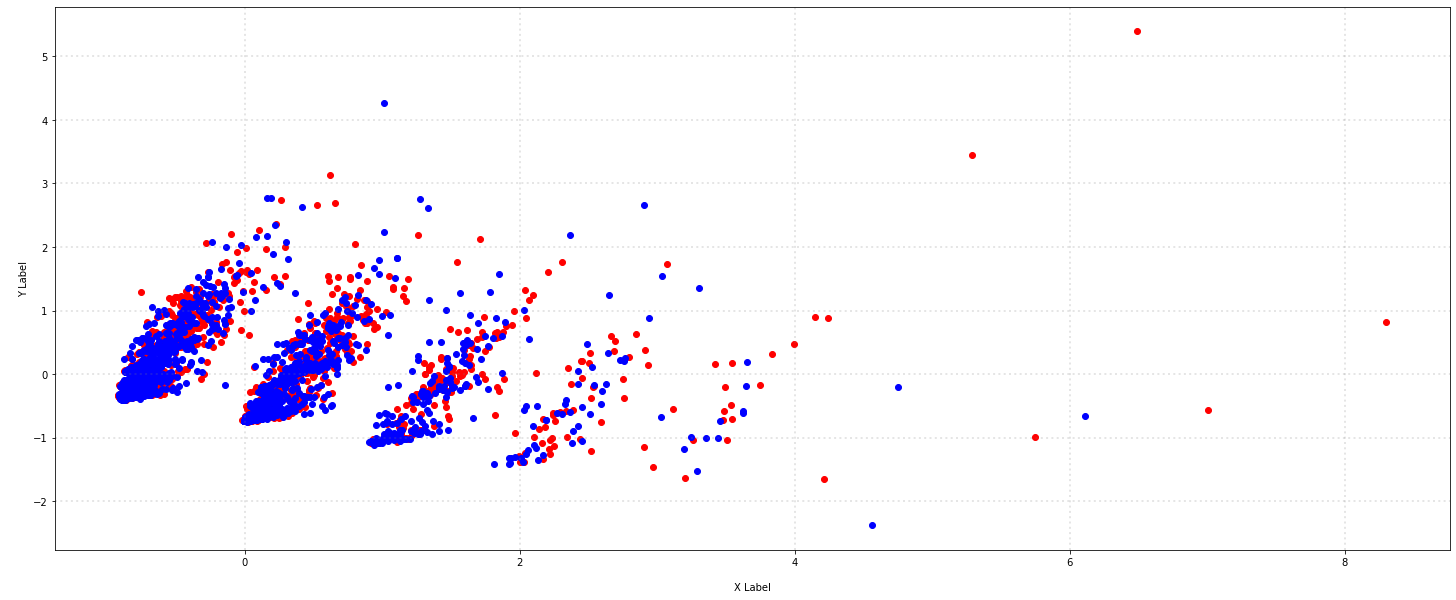

In [91]:
col = ['r', 'b']

categories = ['1', '0']
fig = plt.figure(figsize = (25, 10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = DS_reduced[DS['score'] == category].T[0]
    ys = DS_reduced[DS['score'] == category].T[1]
    
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [68]:
term_frequencies = sum(DS_counts).toarray()[0]

In [69]:
term_frequencies.shape

(5154,)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


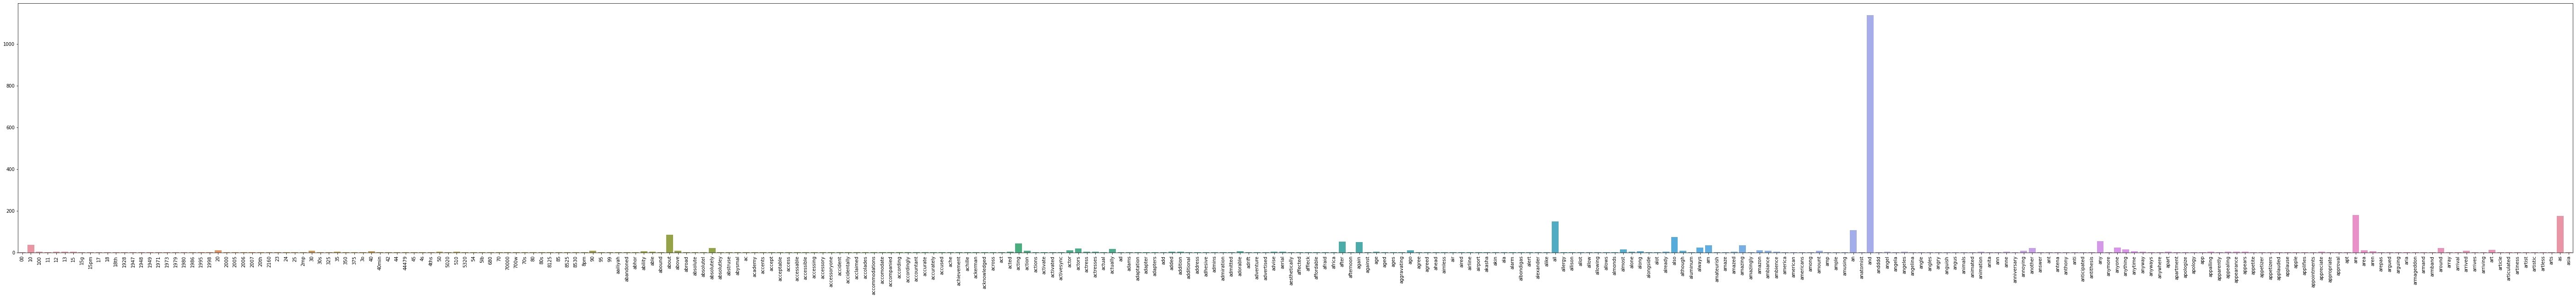

In [70]:
plt.subplots(figsize=(100, 10))
bar = sns.barplot(x=count_vect.get_feature_names()[:300],
                 y=term_frequencies[:300])
bar.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [71]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


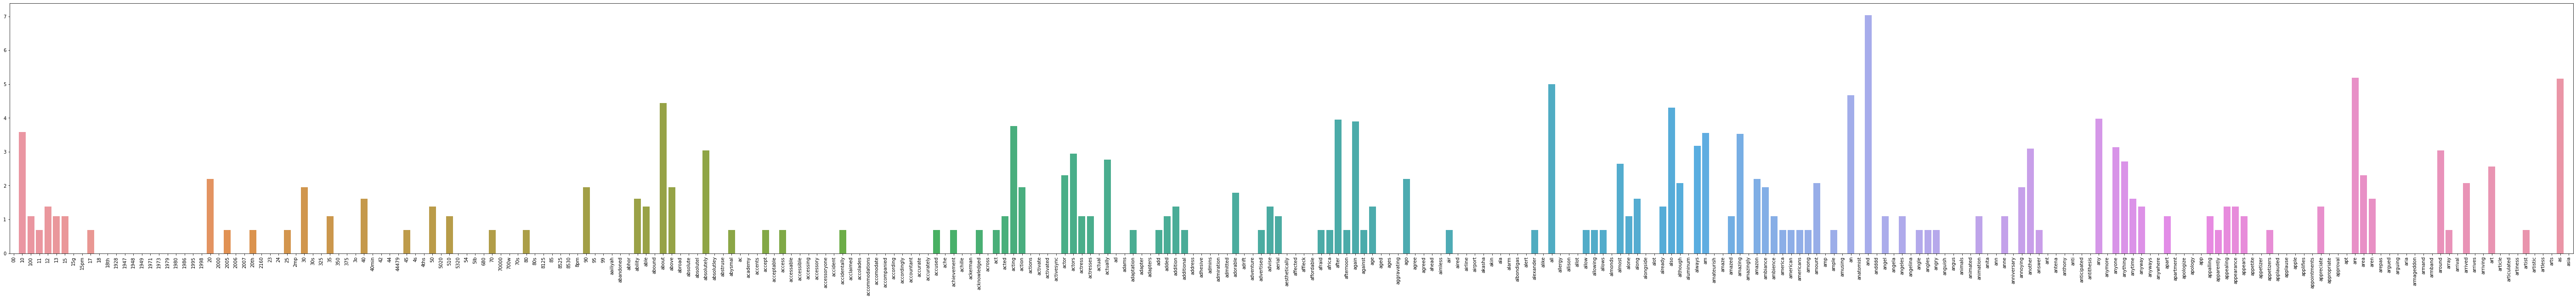

In [72]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [73]:
from sklearn import preprocessing , metrics, decomposition, pipeline, dummy

In [74]:
mlb = preprocessing.LabelBinarizer()

In [75]:
mlb.fit(DS.lib)

LabelBinarizer()

In [76]:
mlb.classes_

array([0., 1., 2.])

In [77]:
DS['bin_category'] = mlb.transform(DS['lib']).tolist()

In [78]:
DS[0:9]

,text,score,lib_name,lib,unigrams,bin_category
0,My Sanyo has survived dozens of drops on black...,1,amazon_cells,0.0,"[My, Sanyo, has, survived, dozens, of, drops, ...","[1, 0, 0]"
1,It was delicious!!!,1,yelp,2.0,"[It, was, delicious, !, !, !]","[0, 0, 1]"
2,Generally; it just lacked imagination.,0,imdb,1.0,"[Generally, ;, it, just, lacked, imagination, .]","[0, 1, 0]"
3,"Still, it makes up for all of this with a supe...",1,imdb,1.0,"[Still, ,, it, makes, up, for, all, of, this, ...","[0, 1, 0]"
4,AVOID THIS ESTABLISHMENT!,0,yelp,2.0,"[AVOID, THIS, ESTABLISHMENT, !]","[0, 0, 1]"
5,This one works and was priced right.,1,amazon_cells,0.0,"[This, one, works, and, was, priced, right, .]","[1, 0, 0]"
6,They made this case too small and is very diff...,0,amazon_cells,0.0,"[They, made, this, case, too, small, and, is, ...","[1, 0, 0]"
7,I got the car charger and not even after a wee...,0,amazon_cells,0.0,"[I, got, the, car, charger, and, not, even, af...","[1, 0, 0]"
8,It's very slow.,0,imdb,1.0,"[It, 's, very, slow, .]","[0, 1, 0]"


In [79]:
doc_to_transform_1 = []
random_record_1 = DS.iloc[50]
random_record_1 = random_record_1['text']
doc_to_transform_1.append(random_record_1)

doc_to_transform_2 = []
random_record_2 = DS.iloc[100]
random_record_2 = random_record_2['text']
doc_to_transform_2.append(random_record_2)

doc_to_transform_3 = []
random_record_3 = DS.iloc[150]
random_record_3 = random_record_3['text']
doc_to_transform_3.append(random_record_3)

In [80]:
print(doc_to_transform_1)
print(doc_to_transform_2)
print(doc_to_transform_3)

['Five star Plus, plus.']
['I have had this phone for over a year now, and I will tell you, its not that great.']
['The folks at Otto always make us feel so welcome and special.']


In [81]:
from sklearn.preprocessing import binarize

In [82]:
doc_vect_count_1 = count_vect.transform(doc_to_transform_1)
doc_vect_count_2 = count_vect.transform(doc_to_transform_2)
doc_vect_count_3 = count_vect.transform(doc_to_transform_3)

In [83]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(doc_vect_count_1, doc_vect_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(doc_vect_count_1, doc_vect_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(doc_vect_count_1, doc_vect_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(doc_vect_count_2, doc_vect_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# TF-ID Feature

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
TFIDF = vectorizer.fit_transform(DS.text)

In [85]:
TFIDF.shape


(2968, 5154)

In [86]:
TFIDF[0].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [87]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(TFIDF, DS.score, test_size=0.25)



In [88]:
bnb = BernoulliNB(binarize = 0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8180592991913747

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(DS_counts, DS.score, test_size=0.25)

In [90]:
bnb = BernoulliNB(binarize = 0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8194070080862533